In [1]:
import cv2
import numpy as np 
import matplotlib.pyplot as plt
import PIL.Image
from datetime import datetime
import PIL.ExifTags
from tqdm import tqdm


import dateutil.parser
import os
import re
import pandas as pd

from matplotlib.ticker import (MultipleLocator, FormatStrFormatter,
                               AutoMinorLocator, MaxNLocator)

from typing import Tuple

In [3]:
df = pd.read_excel(r"C:\Users\DigitalStation\Documents\Python_Scripts\DropletDetection\20220601_BSA_PEG_FC40_subset\csv\results_BSA_PEG_thresh100.xlsx")
print(df)
### filenames ###
filenamesvg = 'BSA_PEG_thresh100.svg'
image_folder = r"C:\Users\DigitalStation\Documents\Python_Scripts\DropletDetection\20220601_BSA_PEG_FC40_subset"

     Image names  LLPS conc. BSA [µM]  LLPS conc. PEG [%]  Area start  \
0                                 NaN                 NaN         NaN   
1    t18_well1_0           115.140647           27.345904   35281.040   
2            NaN           647.888218          153.873452   32031.140   
3     t8_well1_2           230.307986           54.698147   13266.500   
4    t12_well2_7           210.895772           15.184496   42847.812   
5   t14_well2_11           253.780919           18.272226   42847.812   
6   t17_well2_14           218.576527           15.737510   34618.500   
7   t19_well3_13          1899.508407           14.335913   38687.940   
8   t20_well3_14          2064.019846           15.577508   44364.432   
9   t19_well3_15          1844.036643           13.917258   44364.432   
10  t19_well4_13          9708.442331            5.894411   36624.960   
11  t20_well4_14         12671.035352            7.693129   42847.812   
12  t20_well4_15         12281.523674            7.

In [4]:
areas = np.ndarray(shape=(0,2), dtype=float)
LLPS_conc = np.ndarray(shape=(0,2), dtype=float)
data_well = {}
well = {}
concentration = {}
time_resolution = {}

area_column_start = 3
area_column_end = 5
conc_column_start = 1
conc_column_end = 3

# A #
c = 0
row_start = 0
row_end = 3
well_nr = 0
for row in range(row_start,row_end):

    a_areas = df.iloc[row, area_column_start:area_column_end] # [y,x]
    a_areas_ar = np.array(a_areas, dtype=float)
    data_well['areas'] = a_areas_ar

    a_conc = df.iloc[row,conc_column_start:conc_column_end]
    a_conc_ar = np.array(a_conc, dtype=float)
    data_well['LLPS conc'] = a_conc_ar

    data_well['areas'] = a_areas_ar
    data_well['LLPS conc'] = a_conc_ar

    well[well_nr] = data_well.copy()
    concentration[c] = well.copy()
    well_nr += 1

# B #
c = 1
row_start = 1
row_end = 4
well_nr = 0
data_well = {}
well = {}
for row in range(row_start,row_end):

    b_areas = df.iloc[row, area_column_start:area_column_end] # [y,x]
    b_areas_ar = np.array(b_areas, dtype=float)
    data_well['areas'] = b_areas_ar

    b_conc = df.iloc[row,conc_column_start:conc_column_end]
    b_conc_ar = np.array(b_conc, dtype=float)
    data_well['LLPS conc'] = b_conc_ar

    data_well['areas'] = b_areas_ar
    data_well['LLPS conc'] = b_conc_ar

    well[well_nr] = data_well.copy()
    concentration[c] = well.copy()
    well_nr += 1
    
# C #
c = 2
row_start = 4
row_end = 7
well_nr = 0
data_well = {}
well = {}
for row in range(row_start,row_end):
    
    c_areas = df.iloc[row, area_column_start:area_column_end] # [y,x]
    c_areas_ar = np.array(c_areas, dtype=float)
    data_well['areas'] = c_areas_ar

    c_conc = df.iloc[row,conc_column_start:conc_column_end]
    c_conc_ar = np.array(c_conc, dtype=float)
    data_well['LLPS conc'] = c_conc_ar

    data_well['areas'] = c_areas_ar
    data_well['LLPS conc'] = c_conc_ar

    well[well_nr] = data_well.copy()
    concentration[c] = well.copy()
    well_nr += 1


# D #
c = 3
row_start = 7
row_end = 10
well_nr = 0
data_well = {}
well = {}
for row in range(row_start,row_end):

    d_areas = df.iloc[row, area_column_start:area_column_end] # [y,x]
    d_areas_ar = np.array(d_areas, dtype=float)

    d_conc = df.iloc[row,conc_column_start:conc_column_end]
    d_conc_ar = np.array(d_conc, dtype=float)
    data_well['LLPS conc'] = d_conc_ar

    data_well['areas'] = d_areas_ar.copy()
    data_well['LLPS conc'] = d_conc_ar.copy()

    well[well_nr] = data_well.copy()
    concentration[c] = well.copy()
    well_nr += 1

# E #
c = 4
row_start = 10
row_end = 13
well_nr = 0
data_well = {}
well = {}
for row in range(row_start,row_end):
    
    
    e_areas = df.iloc[row, area_column_start:area_column_end] # [y,x]
    e_areas_ar = np.array(e_areas, dtype=float)

    e_conc = df.iloc[row,conc_column_start:conc_column_end]
    e_conc_ar = np.array(e_conc, dtype=float)
    data_well['LLPS conc'] = e_conc_ar

    data_well['areas'] = e_areas_ar.copy()
    data_well['LLPS conc'] = e_conc_ar.copy()

    well[well_nr] = data_well.copy()
    concentration[c] = well.copy()
    well_nr += 1




print(concentration[4])



{0: {'LLPS conc': array([9.70844233e+03, 5.89441141e+00]), 'areas': array([36624.96, 10562.96])}, 1: {'LLPS conc': array([1.26710354e+04, 7.69312861e+00]), 'areas': array([42847.812,  9468.356])}, 2: {'LLPS conc': array([1.22815237e+04, 7.45663937e+00]), 'areas': array([38687.94,  8820.26])}}


In [5]:
#starting_concentrations = np.array(([9.4, 88.6], [21.2, 74.3], [33, 60], [44.8, 45.7], [56.6, 31.4]))  #
starting_concentrations = np.array(([4, 13], [40, 9.5], [100, 7.2], [530, 4], [2800, 1.7]))  # BSA Test set
concentrations = (1,2,3,4)

name_sol1 = "BSA"
unit_sol1 = "µM"
initial_conc_sol1 = 3000

name_sol2 = "PEG"
unit_sol2 = "%"
initial_conc_sol2 = 10

In [14]:
#ticks
x_axis_ticks_division = 5000
x_n_minor_ticks = 5
y_axis_ticks_division = 50
y_n_minor_ticks = 5

## Sizes ##
labelsize = 23
ticklabel_size = 23
linethickness = 4
scattersize = 120

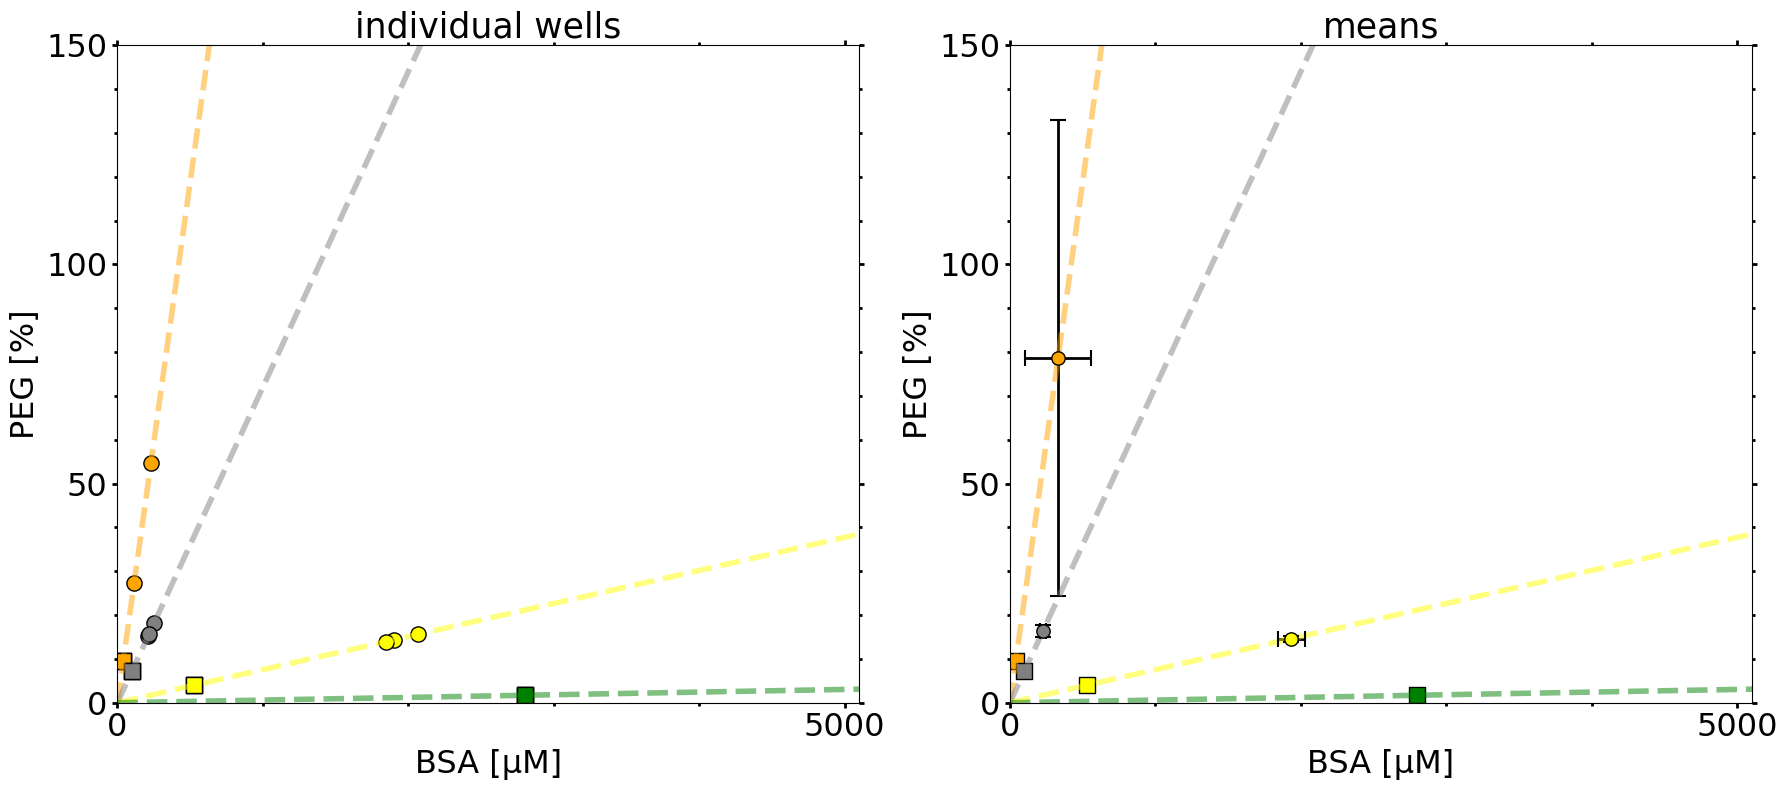

In [16]:
### figure setup ###


fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(18,8), sharex=False, sharey=False)

# set labels
ax1.set_xlabel(f"{name_sol1} [{unit_sol1}]", size=labelsize)
ax1.set_ylabel(f"{name_sol2} [{unit_sol2}]", size=labelsize)

ax2.set_xlabel(ax1.get_xlabel())
ax2.xaxis.label.set_size(ax1.xaxis.label.get_size())
ax2.set_ylabel(ax1.get_ylabel())
ax2.yaxis.label.set_size(ax1.yaxis.label.get_size())

# set limits 
xlim = int(initial_conc_sol1 * 1.7) #16
ylim = int(initial_conc_sol2 * 15) #40
ax1.set_xlim(0, xlim)
ax1.set_ylim(0, ylim)
ax2.set_xlim(0, xlim)
ax2.set_ylim(0, ylim)



# set titles
ax1.set_title('individual wells', fontsize=25)
ax2.set_title('means', fontsize= 25)

# set ticks
ax1.tick_params(axis='y', which='major', right=True, color="black", labelcolor="black", direction='out', labelsize=ticklabel_size)
ax1.tick_params(axis='y', which='minor', right=True)
ax1.tick_params(axis='x', which='major', top=True, labeltop=False, direction='out', labelsize=ticklabel_size)
ax1.tick_params(axis='x', which='minor', bottom=True, top=True)
ax1.minorticks_on()
ax1.xaxis.set_major_locator(MultipleLocator(x_axis_ticks_division))
ax1.xaxis.set_minor_locator(AutoMinorLocator(x_n_minor_ticks))
ax1.yaxis.set_major_locator(MultipleLocator(y_axis_ticks_division ))
ax1.yaxis.set_minor_locator(AutoMinorLocator(y_n_minor_ticks))
ax1.xaxis.set_tick_params(which='both', width=2)
ax1.yaxis.set_tick_params(which='both', width=2)


ax2.tick_params(axis='y', which='major', right=True, color="black", labelcolor="black", direction='out', labelsize=ticklabel_size)
ax2.tick_params(axis='y', which='minor', right=True)
ax2.tick_params(axis='x', which='major', top=True, labeltop=False, direction='out', labelsize=ticklabel_size)
ax2.tick_params(axis='x', which='minor', bottom=True, top=True)
ax2.minorticks_on()
ax2.xaxis.set_major_locator(MultipleLocator(x_axis_ticks_division))
ax2.xaxis.set_minor_locator(AutoMinorLocator(x_n_minor_ticks))
ax2.yaxis.set_major_locator(MultipleLocator(y_axis_ticks_division ))
ax2.yaxis.set_minor_locator(AutoMinorLocator(y_n_minor_ticks))
ax2.xaxis.set_tick_params(which='both', width=2)
ax2.yaxis.set_tick_params(which='both', width=2)


# calculate mean
mean_sol1 = []
mean_sol1 = [0] * 5
mean_sol2 = []
mean_sol2 = [0] * 5
n_llps_wells = []
n_llps_wells = [0] * 5

for conc_nr in concentrations:
    for well_nr in range(len(concentration[conc_nr])): 
        # calculate mean
        mean_sol1[conc_nr] = mean_sol1[conc_nr] + concentration[conc_nr][well_nr]['LLPS conc'][0]
        mean_sol2[conc_nr] = mean_sol2[conc_nr] + concentration[conc_nr][well_nr]['LLPS conc'][1]
        n_llps_wells[conc_nr] += 1
        #mean_sol1[conc_nr] = mean_sol1[conc_nr]/n_llps_wells[conc_nr]
        #mean_sol2[conc_nr] = mean_sol2[conc_nr]/n_llps_wells[conc_nr]
        #m = mean_sol2[conc_nr]/mean_sol1[conc_nr]

# plot starting concentrations and the data
well_nr = 0

for conc_nr in concentrations:
    for well_nr in range(len(concentration[conc_nr])):

        if conc_nr == 0:
            color = "blue"
        if conc_nr == 1:
            color = "orange"
        if conc_nr == 2:
            color = "gray"
        if conc_nr == 3:
            color = "yellow"
        if conc_nr == 4:
            color = "green"
        
        ax1.scatter(starting_concentrations[conc_nr,0], starting_concentrations[conc_nr,1], s=scattersize, c=color, marker="s", edgecolors="black")
        ax1.scatter(concentration[conc_nr][well_nr]['LLPS conc'][0],concentration[conc_nr][well_nr]['LLPS conc'][1],
                    s=scattersize, color=color, marker="o", edgecolors="black")
       
        #ax1.plot([0, mean_sol1[conc_nr],xlim], [0, mean_sol2[conc_nr], m*xlim], color=color, linestyle='dashed', alpha=0.50)

## Standard deviation calculation ##
std_sol1 = np.ndarray(shape=(5))
std_sol2 = np.ndarray(shape=(5))
conc_nr = 0

for conc_nr in concentrations:
    well_nr = 0
    llps_conc_array_sol1 = np.ndarray(shape=(len(concentration[conc_nr])))
    llps_conc_array_sol2 = np.ndarray(shape=(len(concentration[conc_nr])))
    for well_nr in concentration[conc_nr]:
        llps_conc_array_sol1[well_nr] = concentration[conc_nr][well_nr]['LLPS conc'][0]
        llps_conc_array_sol2[well_nr] = concentration[conc_nr][well_nr]['LLPS conc'][1]
        #print(llps_conc_array[well_nr])
    std_sol1[conc_nr] = np.std(llps_conc_array_sol1)
    std_sol2[conc_nr] = np.std(llps_conc_array_sol2)
    
    
## plotting mean plot ##
for conc_nr in concentrations:
    if conc_nr == 0:
        color = "blue"
    if conc_nr == 1:
        color = "orange"
    if conc_nr == 2:
        color = "gray"
    if conc_nr == 3:
        color = "yellow"
    if conc_nr == 4:
        color = "green"
    if n_llps_wells[conc_nr] > 0:
        mean_sol1[conc_nr] = mean_sol1[conc_nr]/n_llps_wells[conc_nr]
        mean_sol2[conc_nr] = mean_sol2[conc_nr]/n_llps_wells[conc_nr]
        m = mean_sol2[conc_nr]/mean_sol1[conc_nr]
    
    ax2.plot([0, mean_sol1[conc_nr],xlim], [0, mean_sol2[conc_nr], m*xlim], color=color, linestyle='dashed', alpha=0.50, linewidth = linethickness)
    ax1.plot([0, mean_sol1[conc_nr],xlim], [0, mean_sol2[conc_nr], m*xlim], color=color, linestyle='dashed', alpha=0.50, linewidth = linethickness)
    ax2.scatter(starting_concentrations[conc_nr,0], starting_concentrations[conc_nr,1], s=scattersize, c=color, marker="s", edgecolors="black")
    #ax2.scatter(mean_sol1[conc_nr],mean_sol2[conc_nr], s=scattersize, color=color,marker="o", edgecolors="black")
    ax2.errorbar(mean_sol1[conc_nr], mean_sol2[conc_nr], std_sol2[conc_nr], std_sol1[conc_nr], ecolor="black", capsize=5.5, elinewidth=2, capthick=1.5, barsabove=False, markeredgecolor="black",
                marker="o", markerfacecolor=color,markersize=scattersize*0.08)
    


## Additional stuff ##
#ax1.scatter(starting_concentrations[0,0], starting_concentrations[0,1], s=scattersize, c="blue", marker="s", edgecolors="black")
#ax1.scatter(starting_concentrations[1,0], starting_concentrations[1,1], s=scattersize, c="orange", marker="s", edgecolors="black")
#ax2.scatter(starting_concentrations[0,0], starting_concentrations[0,1], s=scattersize, c="blue", marker="s", edgecolors="black")
#ax2.scatter(starting_concentrations[1,0], starting_concentrations[1,1], s=scattersize, c="orange", marker="s", edgecolors="black")


#ax2.plot([0, mean_sol1[conc_nr],xlim], [0, mean_sol2[conc_nr], m*xlim], color="blue", linestyle='dashed', alpha=0.50)

#pathtocsv = os.path.join(image_folder, "csv")
plt.style.use("default")
fig.tight_layout() #otherwise fig will be clipped
plt.savefig(image_folder + '/' + filenamesvg, bbox_inches="tight")